In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking the numbers of rows and columns of dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# taking information about the dataset,type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#to check for duplicated values
df.duplicated().sum()

0

In [6]:
#visualising the missing values in datasets
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of data-set survived the Titanic. We can also see age range from 4 to 80. We can find that data contain missing values, like the ‘Age’ feature.

In [8]:
#drop categorical features
#drop 'Cabin' as it has 687 null values
cat_feat = ['PassengerId','Name','Ticket','Cabin']
df.drop(cat_feat,axis=1,inplace=True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df.shape

(891, 8)

In [11]:
# to replace 177 null values in the age column with mean of the age column.
mean = df['Age'].mean()
df['Age'].replace(np.nan,mean,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
#To drop two row of null values in embarked column
df.dropna(subset=['Embarked'], axis=0, inplace=True)

In [13]:
# merging the two family members columns as single column
df['Family_cnt'] = df['SibSp'] + df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_cnt
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Family_cnt    0
dtype: int64

Now no null values are present in dataframe

In [16]:
df.shape

(889, 7)

In [17]:
#to convert catagorical values into numbers
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_cnt
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [18]:
#to get statistical summary of the column
df[['Age','Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,889.0,29.653446,12.968366,0.42,22.0000,29.699118,35.0,80.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.454200,31.0,512.3292


In [19]:
#to get value count
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [20]:
#to get value count
df['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [21]:
#to get value count
df['Sex'].value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [22]:
#to get value count
df['Family_cnt'].value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_cnt, dtype: int64

In [23]:
# copy the data
df2 = df.copy()
  
# apply normalization techniques(min max)
for column in df2.columns:
    df2[column] = (df2[column] - df2[column].min()) / (df2[column].max() - df2[column].min())    
#view normalized data
print(df2)

     Survived  Pclass  Sex       Age      Fare  Embarked  Family_cnt
0         0.0     1.0  1.0  0.271174  0.014151       1.0         0.1
1         1.0     0.0  0.0  0.472229  0.139136       0.0         0.1
2         1.0     1.0  0.0  0.321438  0.015469       1.0         0.0
3         1.0     0.0  0.0  0.434531  0.103644       1.0         0.1
4         0.0     1.0  1.0  0.434531  0.015713       1.0         0.0
..        ...     ...  ...       ...       ...       ...         ...
886       0.0     0.5  1.0  0.334004  0.025374       1.0         0.0
887       1.0     0.0  0.0  0.233476  0.058556       1.0         0.0
888       0.0     1.0  0.0  0.367921  0.045771       1.0         0.3
889       1.0     0.0  1.0  0.321438  0.058556       0.0         0.0
890       0.0     1.0  1.0  0.396833  0.015127       0.5         0.0

[889 rows x 7 columns]


In [24]:
#to get statistical summary of the columns after normalization of the data
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_cnt
0,0.0,1.0,1.0,0.271174,0.014151,1.0,0.1
1,1.0,0.0,0.0,0.472229,0.139136,0.0,0.1
2,1.0,1.0,0.0,0.321438,0.015469,1.0,0.0
3,1.0,0.0,0.0,0.434531,0.103644,1.0,0.1
4,0.0,1.0,1.0,0.434531,0.015713,1.0,0.0


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    float64
 1   Pclass      889 non-null    float64
 2   Sex         889 non-null    float64
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   Embarked    889 non-null    float64
 6   Family_cnt  889 non-null    float64
dtypes: float64(7)
memory usage: 55.6 KB


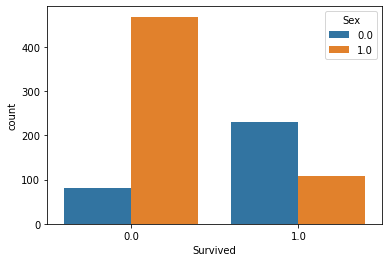

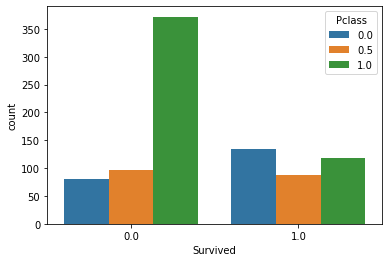

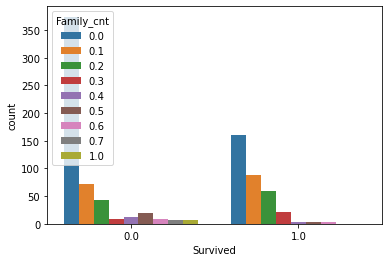

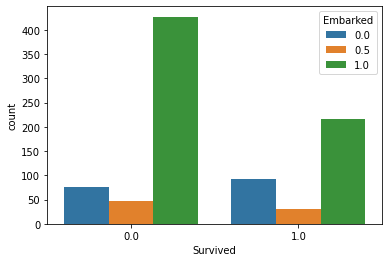

In [26]:
for col in (['Sex','Pclass','Family_cnt','Embarked']):
    plt.figure()
    sns.countplot(x='Survived', hue = col ,data= df2)

1-Number of males who survived are very less than females.

2-Passengers travelling in 3rd class have very less survival rate.

3-passengers travelling alone or with many family members have low survival

4-passengers travelling from Southampton have very less survival rate.

In [27]:
df2.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_cnt
Survived,1.000000,-0.335549,-0.541585,-0.074673,0.255290,-0.169718,0.018277
Pclass,-0.335549,1.000000,0.127741,-0.327954,-0.548193,0.164681,0.064221
Sex,-0.541585,0.127741,1.000000,0.089434,-0.179958,0.110320,-0.203191
Age,-0.074673,-0.327954,0.089434,1.000000,0.088604,-0.028927,-0.247546
Fare,0.255290,-0.548193,-0.179958,0.088604,1.000000,-0.226311,0.218658
Embarked,-0.169718,0.164681,0.110320,-0.028927,-0.226311,1.000000,0.067305
Family_cnt,0.018277,0.064221,-0.203191,-0.247546,0.218658,0.067305,1.000000


<AxesSubplot:>

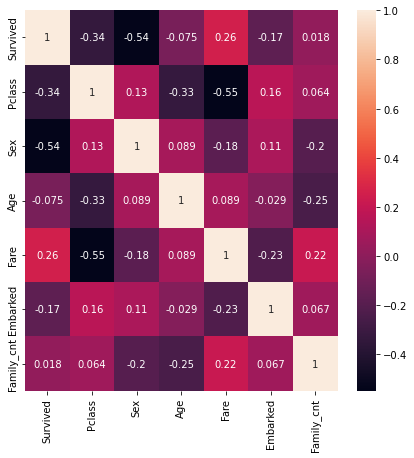

In [28]:
plt.figure(figsize=(7,7))
sns.heatmap(df2.corr(),color ='k',annot=True)

sex,age and embarked are negitively correlated to survived. fare and survived have good positive correlation

Survived         AxesSubplot(0.125,0.657941;0.227941x0.222059)
Pclass        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Sex           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Age              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Fare          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Embarked      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Family_cnt          AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

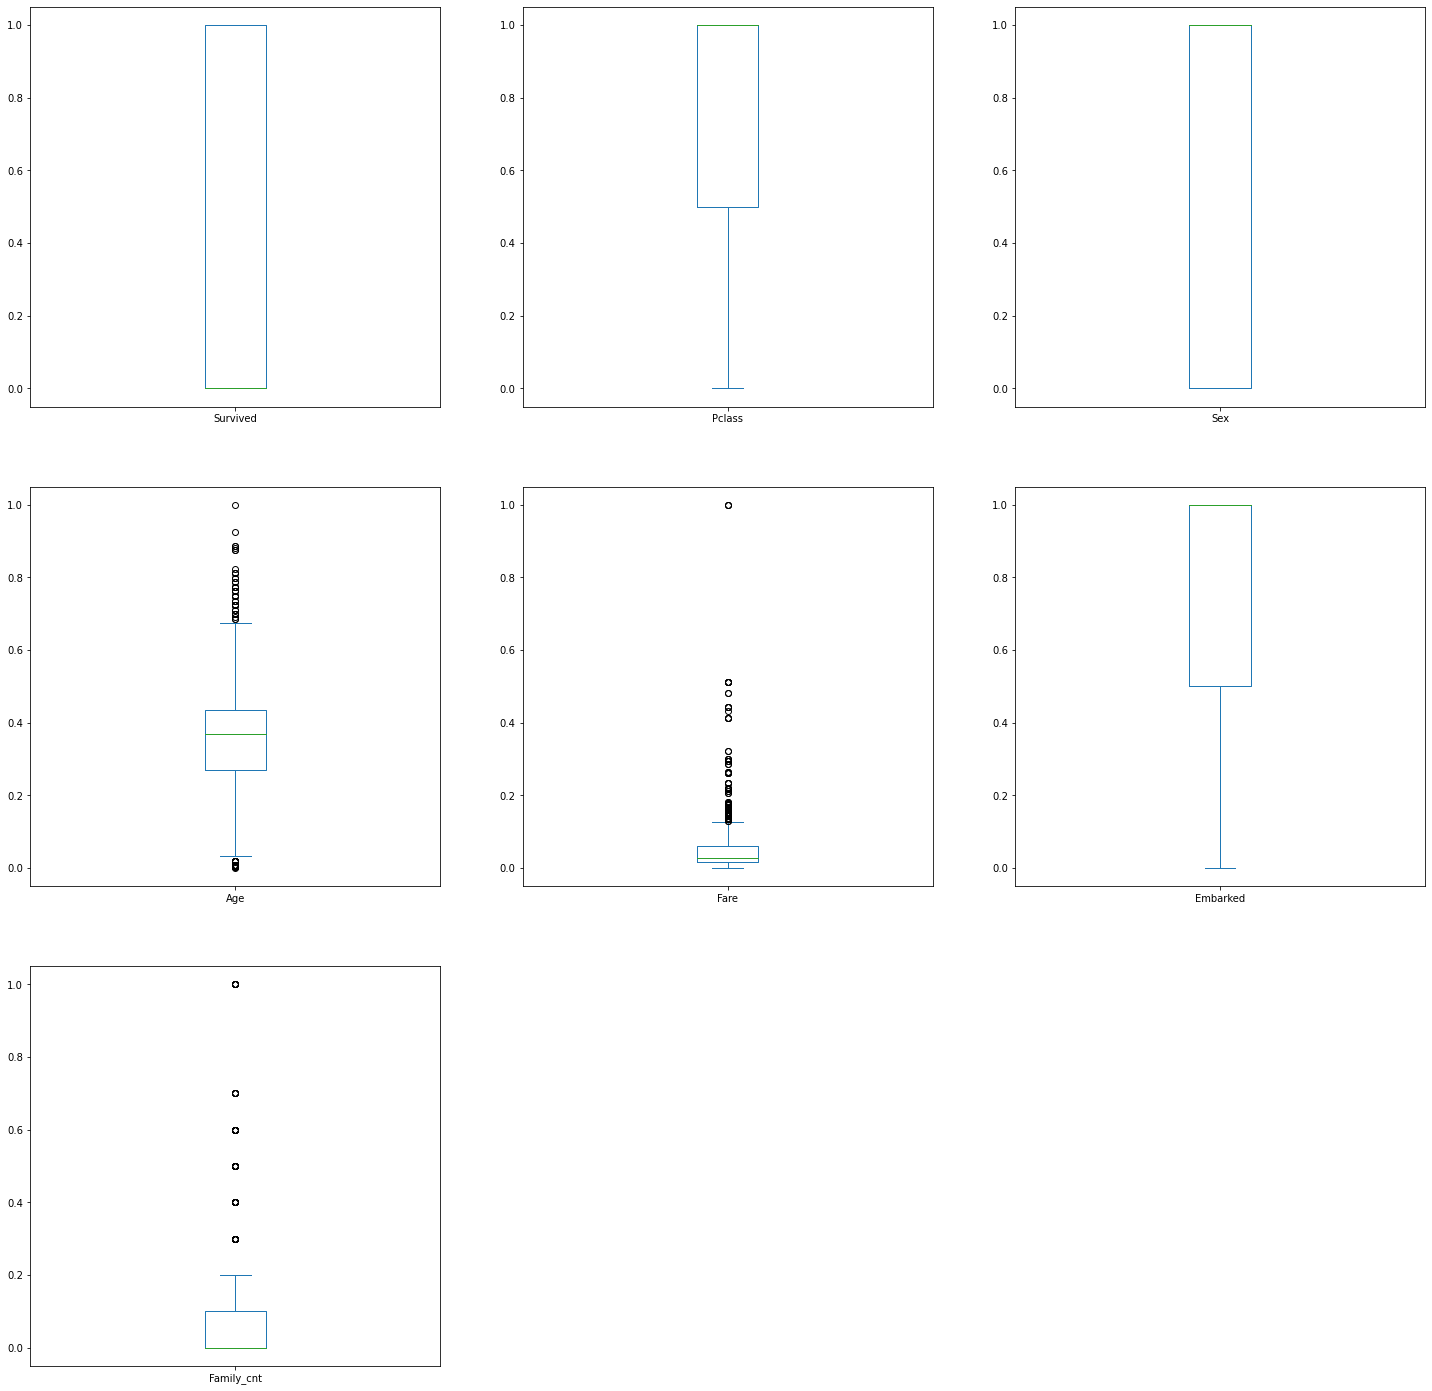

In [29]:
# to find out outliers in the dataset
df2.plot(kind='box',subplots=True, layout=(3,3),figsize=(25,25))

outliers are present age,fare and family_cnt

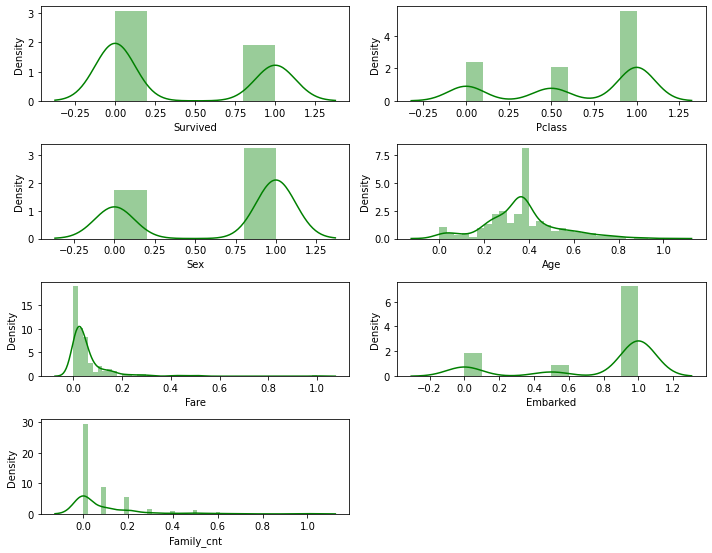

In [30]:
columns = ['Survived','Pclass','Sex','Age','Fare','Embarked','Family_cnt']
plt.figure(figsize = (10,15))
for i in range(len(columns)):
    plt.subplot(8,2, i+1)
    sns.distplot(df2[columns[i]],color = 'g');
plt.tight_layout()

fare and family count columns are rihgt skewed

In [31]:
#to check the skewness in the dataset
df2.skew()

Survived      0.484568
Pclass       -0.636998
Sex          -0.625625
Age           0.431720
Fare          4.801440
Embarked     -1.261367
Family_cnt    2.723892
dtype: float64

In [32]:
#dropping family count and age since they have no relationship with number of survived and contains many outliers.
cat_feat = ['Age','Family_cnt']
df2.drop(cat_feat,axis=1,inplace=True)

In [33]:
df2.shape

(889, 5)

In [34]:
#to remove the skewness in the dataset
from sklearn.preprocessing import power_transform
df_new = power_transform(df2)

In [35]:
#creating new dataset after removing skewness and saving it to 'df'
df = pd.DataFrame(df_new , columns = df2.columns)
df

,Survived,Pclass,Sex,Fare,Embarked
0,-0.786961,0.862195,0.735342,-0.951449,0.612931
1,1.270711,-1.462715,-1.359911,1.629296,-1.755242
2,1.270711,0.862195,-1.359911,-0.887968,0.612931
3,1.270711,-1.462715,-1.359911,1.319896,0.612931
4,-0.786961,0.862195,0.735342,-0.876367,0.612931
...,...,...,...,...,...
884,-0.786961,-0.599548,0.735342,-0.453470,0.612931
885,1.270711,-1.462715,-1.359911,0.573858,0.612931
886,-0.786961,0.862195,-1.359911,0.243028,0.612931
887,1.270711,-1.462715,0.735342,0.573858,-1.755242


In [36]:
#to check if skweness is lying between -0.5 to 0.5
df.skew()[np.abs(df.skew()) < 0.5].all()

True

Survived       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Pclass      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Sex         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Fare           AxesSubplot(0.125,0.391471;0.227941x0.222059)
Embarked    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

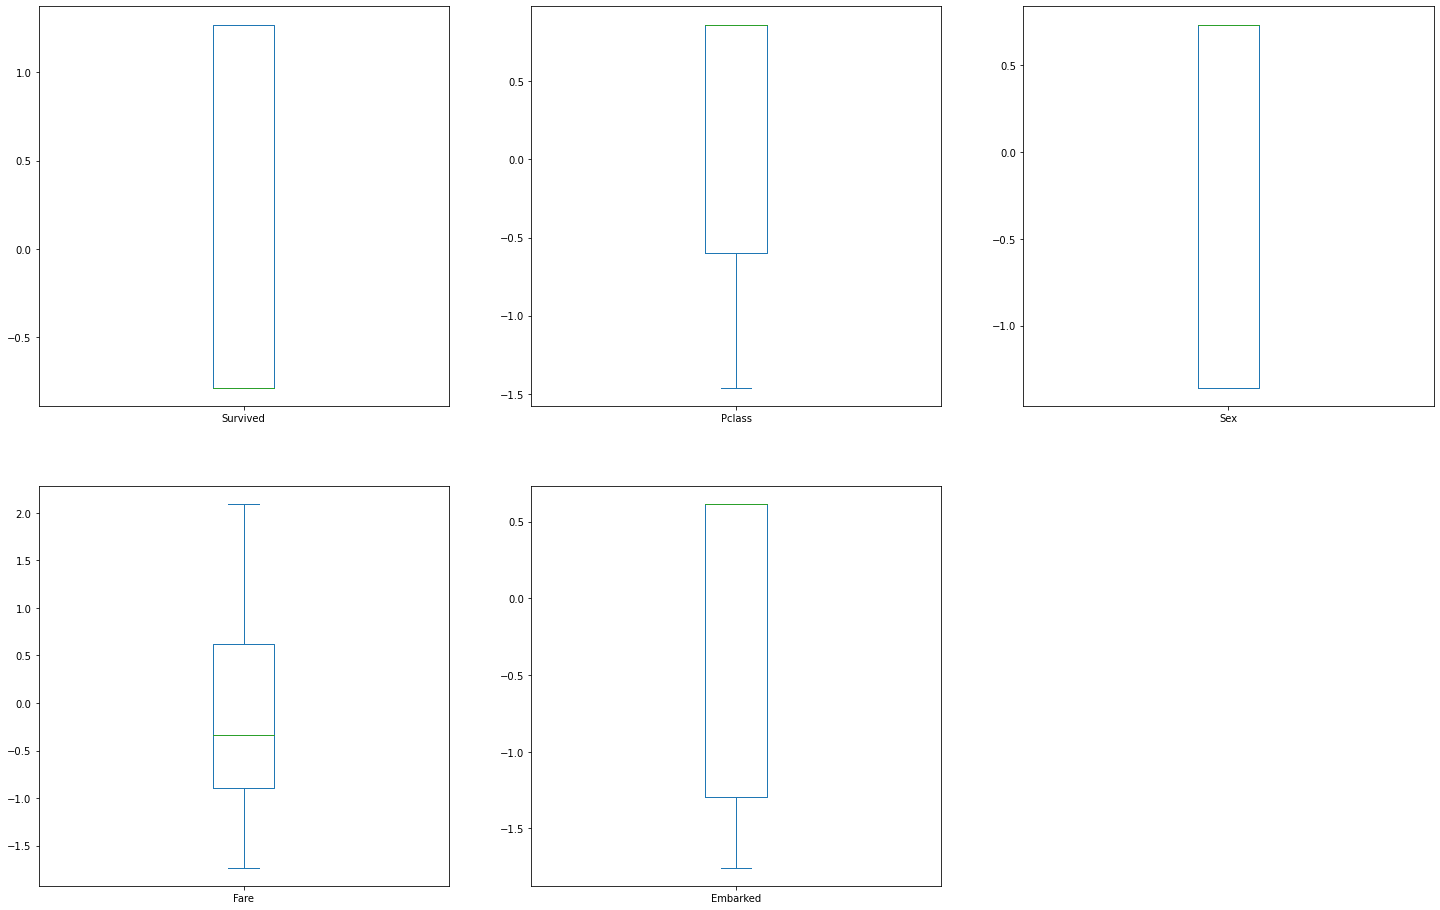

In [37]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True, layout=(3,3),figsize=(25,25))

In [38]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(df)) < 3).all()

Survived    True
Pclass      True
Sex         True
Fare        True
Embarked    True
dtype: bool

In [39]:
#seperate feature variable and target variable
x = df.drop (['Survived'], axis = 1)
y = df['Survived']

In [40]:
x.columns

Index(['Pclass', 'Sex', 'Fare', 'Embarked'], dtype='object')

In [41]:
y

0     -0.786961
1      1.270711
2      1.270711
3      1.270711
4     -0.786961
         ...   
884   -0.786961
885    1.270711
886   -0.786961
887    1.270711
888   -0.786961
Name: Survived, Length: 889, dtype: float64

In [42]:
#to convert y in to integer
le = LabelEncoder()
y=le.fit_transform(y)
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [43]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,889):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)
    

Best accuracy is 0.8539325842696629 on Random_State 853


In [44]:
#spliting dataset into training(80%) and testing(20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=853)

In [45]:
# to check shape after spliting
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (711, 4)
shape of y_train: (711, 4)
shape of x_test: (178, 4)
shape of y_test: (178,)


In [46]:
#build a logistic regression classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 85.39325842696628
[[98  9]
 [17 54]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       107
           1       0.86      0.76      0.81        71

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [47]:
#build a RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(x_train, y_train)
predlr = RF.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 85.39325842696628
[[101   6]
 [ 20  51]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.89       107
           1       0.89      0.72      0.80        71

    accuracy                           0.85       178
   macro avg       0.86      0.83      0.84       178
weighted avg       0.86      0.85      0.85       178



In [48]:
# build a DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(x_train, y_train)
predlr = DT.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 87.07865168539325
[[104   3]
 [ 20  51]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       107
           1       0.94      0.72      0.82        71

    accuracy                           0.87       178
   macro avg       0.89      0.85      0.86       178
weighted avg       0.88      0.87      0.87       178



In [49]:
#build a SVC model
svc=SVC()
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 82.58426966292134
[[104   3]
 [ 28  43]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       107
           1       0.93      0.61      0.74        71

    accuracy                           0.83       178
   macro avg       0.86      0.79      0.80       178
weighted avg       0.85      0.83      0.82       178



In [50]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(LR,x,y,cv=None).mean())
print('cross validation score of desicion tree model = ', cross_val_score(DT,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())

cross validation score of random forest model =  0.7997905160921729
cross validation score of logistic regression model =  0.7727924839713071
cross validation score of desicion tree model =  0.8144163016568273
cross validation score of standard vector machine model =  0.8054084936202628


In [51]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [52]:
gcv = GridSearchCV(DecisionTreeClassifier(random_state=853), parameters, verbose=1, cv=10, n_jobs=-1)

In [53]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 50400 candidates, totalling 504000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=853),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [54]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [55]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [56]:
# finding best estimator
gcv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       min_weight_fraction_leaf=0.1, random_state=853)

In [57]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc1 =accuracy_score(y_test,pred)
print(acc*100)

82.58426966292134


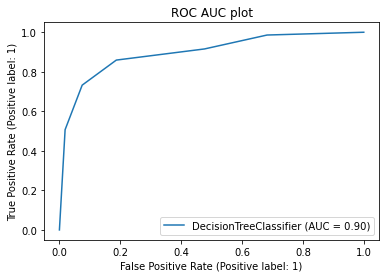

In [58]:
#ploting ROC and AUC curve
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

DecisionTreeClassifier model has 90% accuracy

In [59]:
# to save the model
model=DecisionTreeClassifier(max_depth=3, max_features='auto',
                       min_weight_fraction_leaf=0.1, random_state=853)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       min_weight_fraction_leaf=0.1, random_state=853)

In [67]:
#to save the model
import joblib
joblib.dump(model,'Titanic Project.pkl')

['Titanic Project.pkl']